### Classification of Credit Card Fraud with Machine Learning in Python

#### Load the CSV Data File into a Pandas DataFrame

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('credit_card.csv')
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:18:07,343464013864032,fraud_Kunde-Sanford,misc_net,2.55,Jodi,Foster,F,551 Zachary Freeway,Bailey,...,35.8072,-78.0892,6629,Call centre manager,1962-08-13,abe0676c18f34fa305b113fa762e29b5,1325377087,36.749870,-78.677870,0
2,2019-01-01 00:37:18,4265776278887457,fraud_Pacocha-O'Reilly,grocery_pos,103.00,Christine,Best,F,68248 Deanna Land,Enola,...,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,289789e617eece42a9cafe36680b1b69,1325378238,35.034285,-92.343010,0
3,2019-01-01 00:56:59,571465035400,"fraud_Reichert, Huels and Hoppe",shopping_net,113.40,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,...,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,9d660a18154a3ba5fe869f373c6f819c,1325379419,42.868965,-108.503350,0
4,2019-01-01 01:16:52,6593250708747804,fraud_Brekke and Sons,gas_transport,55.18,Melissa,Meza,F,244 Abbott Parkway,Loxahatchee,...,26.7383,-80.2760,26551,Paramedic,1977-01-04,3c6158c556727d527f8b51cc03b30236,1325380612,27.346033,-80.475563,0


#### Find Statistical Properties of the DataFrame and Check NaN Values

In [3]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.907300e+04,59073.000000,59073.000000,59073.000000,59073.000000,5.907300e+04,5.907300e+04,59073.000000,59073.000000,59073.000000
mean,4.155063e+17,125.809682,48936.650805,38.535668,-90.300925,8.999355e+04,1.349139e+09,38.530650,-90.301737,0.127063
std,1.305091e+18,245.649462,26897.427002,5.082398,13.872055,3.056844e+05,1.296902e+07,5.118062,13.884615,0.333046
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.038876,-166.620488,0.000000
25%,1.800462e+14,11.510000,26292.000000,34.703100,-96.798000,7.410000e+02,1.338510e+09,34.795189,-96.904179,0.000000
50%,3.523898e+15,52.520000,48088.000000,39.319900,-87.456900,2.457000e+03,1.349187e+09,39.333993,-87.378850,0.000000
75%,4.642255e+15,101.050000,72042.000000,41.846700,-80.175200,2.032800e+04,1.359542e+09,41.918596,-80.285566,0.000000
max,4.992346e+18,14238.110000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371816e+09,67.510267,-66.961923,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59073 entries, 0 to 59072
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  59073 non-null  object 
 1   cc_num                 59073 non-null  int64  
 2   merchant               59073 non-null  object 
 3   category               59073 non-null  object 
 4   amt                    59073 non-null  float64
 5   first                  59073 non-null  object 
 6   last                   59073 non-null  object 
 7   gender                 59073 non-null  object 
 8   street                 59073 non-null  object 
 9   city                   59073 non-null  object 
 10  state                  59073 non-null  object 
 11  zip                    59073 non-null  int64  
 12  lat                    59073 non-null  float64
 13  long                   59073 non-null  float64
 14  city_pop               59073 non-null  int64  
 15  jo

#### Compute Average Values Spend Per Fraud

In [5]:
print("Median Spend per Fraud Category:")
print(data.groupby("is_fraud")["amt"].median())
print('\n')
print("Mean Spend per Fraud Category:")
print(data.groupby("is_fraud")["amt"].mean())

Median Spend per Fraud Category:
is_fraud
0     47.240
1    396.505
Name: amt, dtype: float64


Mean Spend per Fraud Category:
is_fraud
0     66.784314
1    531.320092
Name: amt, dtype: float64


#### Calculate Total Fraud and Non-fraud Spend on a Specific Credit Card

In [6]:
data[(data["cc_num"] == 344709867813900)].groupby('is_fraud').sum()["amt"]

is_fraud
0    11667.49
1     6450.28
Name: amt, dtype: float64

In [7]:
#data[(data["cc_num"] == 344709867813900) & (data["is_fraud"] == 0)]["amt"].sum()

In [8]:
#data[(data["cc_num"] == 344709867813900) & (data["is_fraud"] == 1)]["amt"].sum()

#### Clean Data Columns

In [9]:
#1. Drop the columns

data = data.drop(["unix_time", "trans_num"], axis=1)

In [10]:
#2. Remove the date portion of the timestamp

data["trans_date_trans_time"] = data["trans_date_trans_time"].apply(lambda x: x.split(" ")[1])

In [11]:
#3. Create a function to bin timestamps into categories

def quantitize(string):
    time_hour = int(string[:2])
    if time_hour < 6:
        return 0
    elif 6 <= time_hour < 12:
        return 1
    elif 12 <= time_hour <18:
        return 2
    else:
        return 3

In [12]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,00:18:07,343464013864032,fraud_Kunde-Sanford,misc_net,2.55,Jodi,Foster,F,551 Zachary Freeway,Bailey,NC,27807,35.8072,-78.0892,6629,Call centre manager,1962-08-13,36.749870,-78.677870,0
2,00:37:18,4265776278887457,fraud_Pacocha-O'Reilly,grocery_pos,103.00,Christine,Best,F,68248 Deanna Land,Enola,AR,72047,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,35.034285,-92.343010,0
3,00:56:59,571465035400,"fraud_Reichert, Huels and Hoppe",shopping_net,113.40,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,42.868965,-108.503350,0
4,01:16:52,6593250708747804,fraud_Brekke and Sons,gas_transport,55.18,Melissa,Meza,F,244 Abbott Parkway,Loxahatchee,FL,33470,26.7383,-80.2760,26551,Paramedic,1977-01-04,27.346033,-80.475563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59068,01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,Vero Beach,FL,32960,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,26.888686,-80.834389,1
59069,01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,Vero Beach,FL,32960,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,28.216707,-79.855648,1
59070,02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,LA,70726,30.4590,-90.9027,71335,Herbalist,1994-05-31,29.700456,-91.361632,1
59071,03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,32.675272,-103.484949,1


In [13]:
#4. Apply the function

data["trans_date_trans_time"] = data["trans_date_trans_time"].apply(quantitize)

In [14]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,0,343464013864032,fraud_Kunde-Sanford,misc_net,2.55,Jodi,Foster,F,551 Zachary Freeway,Bailey,NC,27807,35.8072,-78.0892,6629,Call centre manager,1962-08-13,36.749870,-78.677870,0
2,0,4265776278887457,fraud_Pacocha-O'Reilly,grocery_pos,103.00,Christine,Best,F,68248 Deanna Land,Enola,AR,72047,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,35.034285,-92.343010,0
3,0,571465035400,"fraud_Reichert, Huels and Hoppe",shopping_net,113.40,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,42.868965,-108.503350,0
4,0,6593250708747804,fraud_Brekke and Sons,gas_transport,55.18,Melissa,Meza,F,244 Abbott Parkway,Loxahatchee,FL,33470,26.7383,-80.2760,26551,Paramedic,1977-01-04,27.346033,-80.475563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59068,0,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,Vero Beach,FL,32960,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,26.888686,-80.834389,1
59069,0,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,Vero Beach,FL,32960,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,28.216707,-79.855648,1
59070,0,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,LA,70726,30.4590,-90.9027,71335,Herbalist,1994-05-31,29.700456,-91.361632,1
59071,0,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,32.675272,-103.484949,1


In [15]:
#5. Confirm with a value count:

data["trans_date_trans_time"].value_counts()

3    19819
2    16133
0    12714
1    10407
Name: trans_date_trans_time, dtype: int64

#### Create a Visual Correlation Matrix of Data Features

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Create Figure

plt.figure(figsize=(6,4),dpi=150)

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

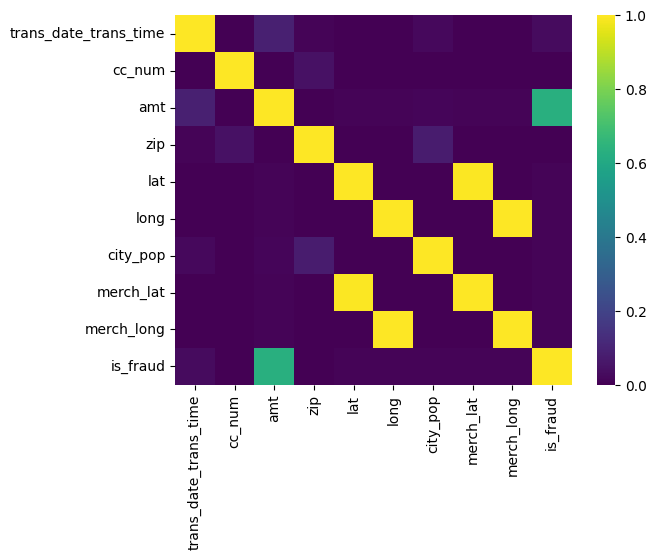

In [18]:
# Create Heatmap

sns.heatmap(data.corr(),vmin=0,vmax=1,cmap="viridis")

In [19]:
# notice how the amount spent, and long and lat location information are by far the most correlated features to fraud

#### Encode Categorical Data Features

In [20]:
# Perform Imports of Scikit-Learn

from sklearn.preprocessing import LabelEncoder

In [21]:
# Create the encoder

encoder = LabelEncoder()

In [22]:
# Get the categorical features with Pandas

categorical_features = data.select_dtypes(include=['object']).columns

In [23]:
# Apply fit_transform to create the encoded category data columns

data_encoded = data.copy()
data_encoded[categorical_features] = data_encoded[categorical_features].apply(encoder.fit_transform)
 
# Display dataframe
data_encoded

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,162,18,0,568,526,27,28654,36.0788,-81.1781,3495,370,779,36.011293,-82.048315,0
1,0,343464013864032,351,8,2.55,171,138,0,552,45,27,27807,35.8072,-78.0892,6629,59,317,36.749870,-78.677870,0
2,0,4265776278887457,468,4,103.00,73,30,0,681,250,2,72047,35.2087,-92.2123,969,337,182,35.034285,-92.343010,0
3,0,571465035400,502,11,113.40,222,127,1,464,272,50,82514,43.0048,-108.8964,1645,202,572,42.868965,-108.503350,0
4,0,6593250708747804,77,2,55.18,239,285,0,236,463,9,33470,26.7383,-80.2760,26551,327,589,27.346033,-80.475563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59068,0,3524574586339330,295,11,977.01,27,54,0,928,829,9,32960,27.6330,-80.4031,105638,271,741,26.888686,-80.834389,1
59069,0,3524574586339330,571,11,1210.91,27,54,0,928,829,9,32960,27.6330,-80.4031,105638,271,741,28.216707,-79.855648,1
59070,0,4005676619255478,622,2,10.24,348,339,1,465,209,18,70726,30.4590,-90.9027,71335,222,880,29.700456,-91.361632,1
59071,0,3560725013359375,107,2,21.69,51,404,0,640,592,43,79759,31.8599,-102.7413,23,115,446,32.675272,-103.484949,1


#### Perform a Train-Test Split on the Data

In [24]:
# Perform a train-test split on the dataset to create a training set for the machine learning model and a test set for evaluation metrics. Use a test size of 10% of the total data set.

In [25]:


# create a boostrapped dataset with same rows as original dataset, randomly select samples, the samples can be repetitive. 
# create a decision tree using the bootstrapped dataset, but only use a random subset of variables at each step. 
# The variety of multiple decision tree makes predicition more accuarte than individual decision tree.
# Out of bag dataset is not used to run the tree. 


In [26]:
#1. Import tools from scikit-learn (boostrap+aggregation -> bagging)

from sklearn.model_selection import train_test_split

In [27]:
#2. Separate Features and Label

data_encoded, labels = data_encoded.drop("is_fraud", axis=1), data_encoded["is_fraud"]

In [28]:
#3. Perform the split

X_train, X_test, y_train, y_test = train_test_split(data_encoded, labels, test_size = 0.1, random_state = 42)

In [29]:
X_train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long
27896,3,4810789809665942990,213,6,137.70,186,381,0,905,86,35,45307,39.5756,-83.7153,338,381,785,39.026884,-84.025714
13298,1,344709867813900,416,8,179.81,169,203,0,300,740,9,33872,27.4703,-81.4872,50835,178,731,26.710113,-81.945262
36658,3,3501509250702469,39,7,13.63,126,7,1,57,554,9,34112,26.1184,-81.7361,276002,364,619,25.339302,-81.642556
44227,2,3502377050801561,481,6,56.19,193,259,0,658,563,43,77358,30.5354,-95.4532,4993,409,132,30.716492,-95.650676
55341,3,3502377050801561,570,4,290.90,193,259,0,658,563,43,77358,30.5354,-95.4532,4993,409,132,31.412084,-95.591435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,3,180069253480336,502,11,887.77,348,208,1,508,249,38,15834,41.5177,-78.2536,4533,375,449,40.753167,-78.108075
38158,3,374930071163758,13,11,3.42,91,118,1,616,704,22,48174,42.2203,-83.3583,31515,345,486,41.858656,-84.255813
860,3,4727244663135968,339,13,1.29,231,245,0,109,56,1,36507,30.8635,-87.7644,19090,406,20,30.054981,-86.809340
15795,2,2712209726293386,137,9,218.98,161,45,0,516,52,18,70808,30.4066,-91.1468,378909,123,590,29.420234,-91.661671


In [30]:
X_test

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long
41759,0,2348245054386329,63,9,4.31,187,153,1,267,323,38,16421,42.1767,-79.9416,2518,185,111,41.845526,-79.813488
42755,3,3501942333500073,661,8,1.57,221,31,0,77,644,3,85086,33.8155,-112.1202,1312922,112,946,33.989340,-111.341259
42202,2,38057513087029,495,7,29.29,228,74,0,266,727,4,95148,37.3304,-121.7913,973849,215,911,37.313983,-121.883682
36121,3,4560004149983868183,7,6,48.77,307,439,0,201,166,5,80951,38.8881,-104.6556,525713,303,847,38.819329,-105.511358
4053,3,30501624614310,593,11,1.13,10,404,0,176,735,40,29939,32.6786,-81.2455,302,277,520,32.970598,-80.690980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56007,3,4457486401506,342,8,764.14,174,375,1,56,552,34,10954,41.0977,-74.0109,23045,36,347,40.518713,-73.201092
34494,2,4800395067176717,684,10,22.36,91,323,1,881,361,29,68641,41.6964,-96.9858,1063,393,12,41.171682,-96.120205
52955,3,2720830304681674,7,6,258.26,239,3,0,213,149,42,37040,36.5220,-87.3490,151785,329,537,35.719370,-87.293215
7821,3,3543591270174051,528,11,3.21,225,235,0,688,28,38,15920,40.4603,-79.0097,922,137,510,39.952058,-79.000502


In [31]:
y_train

27896    0
13298    0
36658    0
44227    0
55341    1
        ..
54343    1
38158    0
860      0
15795    0
56422    1
Name: is_fraud, Length: 53165, dtype: int64

In [32]:
y_test

41759    0
42755    0
42202    0
36121    0
4053     0
        ..
56007    1
34494    0
52955    1
7821     0
28518    0
Name: is_fraud, Length: 5908, dtype: int64

#### Train a Random Forest Classifier Model

In [33]:
# Using Scikit-Learn create and train a random forest classifier on the training data set.

In [34]:
# Import Random Forest class

from sklearn.ensemble import RandomForestClassifier

# Create the instance of the model (you can also edit hyperparameters further)

classifier = RandomForestClassifier(class_weight='balanced')

# Fit the classifier to the training data set

classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [35]:
#The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### Evaluate the Model on the Test Set

In [37]:
# Using the trained Random Forest classifier, evaluate performance of the model on the test set using accuracy as the performance metric. Also, create a confusion matrix on the results of the test data set.

In [38]:
# Import the metrics methods

from sklearn.metrics import accuracy_score, confusion_matrix


In [39]:
# Create the predictions

preds = classifier.predict(X_test)

In [40]:
# Calculate the accuracy

accuracy_score(preds, y_test)
 

0.9807041299932295

In [41]:
# Create the confusion matrix

confusion_matrix(y_test, preds)

array([[5115,   16],
       [  98,  679]])

In [42]:
# The final accuracy and confusion matrix results should be similar to this (but may be different depending on the random seed used for the train test split).